# USA Gymnast with best chances to medal in BB  are:

- skye blakely, joscelyn roberson

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [14]:
df = pd.read_csv('../../Combine_Data/women/bb_encoded.csv')
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_w_olympics_bb.csv')
bbnames = pd.read_csv('../../Data/cleandata22-23/encoded_w_olympics_bbnames.csv')

In [15]:
df

Rank  D Score  E Score  Pen.   Total  year  medal  Name  nation  \
0     1.0      5.0    8.566   0.0  13.566  2019      0   373      10   
1     2.0      5.4    8.100   0.0  13.500  2019      0   128       2   
2     3.0      5.1    7.966   0.0  13.066  2019      0   244      32   
3     4.0      5.1    7.933   0.0  13.033  2019      0   108       2   
4     5.0      5.1    7.333   0.0  12.433  2019      0   209      54   
..    ...      ...      ...   ...     ...   ...    ...   ...     ...   
582  85.0      4.4    4.566   0.0   8.966  2015      0    12      35   
583  86.0      4.6    4.266   0.0   8.866  2015      0   225      15   
584  87.0      3.6    5.266  -0.1   8.766  2015      0   282      21   
585  88.0      2.5    5.500   0.0   8.000  2015      0   146      36   
586  89.0      0.7    8.433  -8.0   1.133  2015      0   204       4   

     round_final  round_qual  
0           True       False  
1           True       False  
2           True       False  
3           True       False  
4           True       False  
..           ...         ...  
582        False        True  
583        False        True  
584        False        True  
585        False        True  
586        False        True  

[587 rows x 11 columns]

In [37]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Assuming df is your DataFrame with the given data

# Features (X) are all columns except 'medal', 'Name', 'nation', and 'round_final'/'round_qual'
X = df.drop(columns=['medal', 'round_final', 'round_qual'])

# Target variable (y) is 'medal'
y = df['medal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

# Define anomaly detection models
anomaly_models = {
    "Isolation Forest": IsolationForest(contamination=0.01, random_state=42),
    "One-Class SVM": OneClassSVM(gamma='auto'),
    "Local Outlier Factor": LocalOutlierFactor(contamination=0.01, novelty=True),
}

results_anomaly = {}

# Iterate through each anomaly detection model
for name, model in anomaly_models.items():
    # Create a pipeline with StandardScaler for models that require it
    if name != "Isolation Forest":
        model = make_pipeline(StandardScaler(), model)

    # Fit the model to the training data
    model.fit(X_train)

    # Make predictions on the test data
    if hasattr(model, 'predict'):
        y_pred = model.predict(X_test)
    else:
        y_pred = model.fit_predict(X_test)

    y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

    # Evaluate the model's performance
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    report = classification_report(y_test, y_pred_binary)

    results_anomaly[name] = {
        "classification_report": report,
        "confusion_matrix": conf_matrix,
    }

# Print the results for anomaly detection models
for name, result in results_anomaly.items():
    print(f"Anomaly Detection Model: {name}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Anomaly Detection Model: Isolation Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        69
           1       0.00      0.00      0.00         2

    accuracy                           0.94        71
   macro avg       0.49      0.49      0.49        71
weighted avg       0.94      0.94      0.94        71

Confusion Matrix:
[[67  2]
 [ 2  0]]

Anomaly Detection Model: One-Class SVM
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.52      0.68        69
           1       0.03      0.50      0.06         2

    accuracy                           0.52        71
   macro avg       0.50      0.51      0.37        71
weighted avg       0.95      0.52      0.66        71

Confusion Matrix:
[[36 33]
 [ 1  1]]

Anomaly Detection Model: Local Outlier Factor
Classification Report:
              precision    recall  f1-score   support

           0       

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [16]:

y = df['medal']
X = df.drop(columns=['medal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
}

results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create a pipeline with StandardScaler for classifiers that require it
    if name in ["SVM", "K-Nearest Neighbors", "Neural Network"]:
        clf = make_pipeline(StandardScaler(), clf)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
    }

# Print the results
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Classifier: Random Forest
Accuracy: 0.9718
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        69
           1       0.00      0.00      0.00         2

    accuracy                           0.97        71
   macro avg       0.49      0.50      0.49        71
weighted avg       0.94      0.97      0.96        71

Confusion Matrix:
[[69  0]
 [ 2  0]]

Classifier: AdaBoost
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00         2

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

Confusion Matrix:
[[69  0]
 [ 0  2]]

Classifier: SVM
Accuracy: 0.9718
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.0

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-

In [17]:
df = pd.read_csv('../../Combine_Data/women/bb_encoded.csv')
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_w_olympics_bb.csv')
bbnames = pd.read_csv('../../Data/cleandata22-23/encoded_w_olympics_bbnames.csv')

In [18]:
clf = make_pipeline(StandardScaler(), SVC())

In [19]:
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)


<!-- Classifier: AdaBoost
Accuracy: 1.0000


Classifier: SVM
Accuracy: 0.9831


Classifier: Decision Tree
Accuracy: 0.9831

Classifier: K-Nearest Neighbors
Accuracy: 0.9746

Classifier: Random Forest
Accuracy: 0.9746 -->

In [20]:
# # Create and train the DecisionTreeClassifier
# decision_tree_model = DecisionTreeClassifier(random_state=42)
# clf=decision_tree_model.fit(X_train, y_train)
# decision_tree_model.fit(X_train, y_train)

# # Make predictions
# y_pred = decision_tree_model.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# # Generate a classification report
# class_report = classification_report(y_test, y_pred)
# print(class_report)

# # Calculate the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# # Plot the confusion matrix using a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()


AdaBoost Classifier
Accuracy: 0.9859
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        69
           1       1.00      0.50      0.67         2

    accuracy                           0.99        71
   macro avg       0.99      0.75      0.83        71
weighted avg       0.99      0.99      0.98        71

Confusion Matrix:
[[69  0]
 [ 1  1]]
AUC-ROC Score: 1.0000


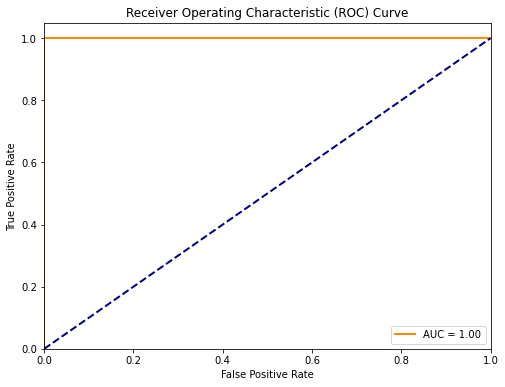

In [25]:
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

# Initialize the AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=31)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

y_pred_proba = clf.predict_proba(X_test)[:, 1]


# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the results
print("AdaBoost Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"AUC-ROC Score: {roc_auc:.4f}")




# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [13]:
olymp = olymp.drop(columns=['round_aafinal', 'round_teamfinal', 'round_teamqual'])

In [14]:
olymp.head()

Rank  D Score  E Score  Pen.   Total  year  Name  nation  round_final  \
0  100.0      4.8    6.200   0.0  11.000  2022   305      25        False   
1   14.0      4.8    5.966   0.0  10.766  2022   305      25        False   
2  144.0      4.8    5.866   0.0  10.666  2023   305      25        False   
3   22.0      4.8    6.733   0.0  11.533  2023   305      25        False   
4    8.0      4.8    6.566   0.0  11.366  2023   305      25         True   

   round_qual  
0        True  
1        True  
2        True  
3        True  
4       False

In [15]:
df.head()

Rank  D Score  E Score  Pen.   Total  year  medal  Name  nation  \
0   1.0      5.0    8.566   0.0  13.566  2019      0   373      10   
1   2.0      5.4    8.100   0.0  13.500  2019      0   128       2   
2   3.0      5.1    7.966   0.0  13.066  2019      0   244      32   
3   4.0      5.1    7.933   0.0  13.033  2019      0   108       2   
4   5.0      5.1    7.333   0.0  12.433  2019      0   209      54   

   round_final  round_qual  
0         True       False  
1         True       False  
2         True       False  
3         True       False  
4         True       False

In [16]:
olymp_pred = decision_tree_model.predict(olymp)


In [17]:
ypreds  = pd.Series(olymp_pred)

In [18]:
olymp['ypred']=ypreds

In [19]:
olymp['ypred'].value_counts()

ypred
0    2277
1       7
Name: count, dtype: int64

In [20]:
filtered_df = olymp[olymp['ypred'] == 1]

In [21]:
filtered_df

Rank  D Score  E Score  Pen.   Total  year  Name  nation  round_final  \
187    5.0      6.2    7.100   0.0  13.300  2022   652      87         True   
190    0.0      6.3    7.150   0.0  13.450  2022   652      87        False   
582    2.0      5.0    8.650   0.0  13.650  2023   320      31         True   
1622   0.0      6.2    7.000   0.0  13.200  2023   328      87         True   
2248   6.0      6.2    6.900   0.0  13.100  2023   582      15         True   
2250   0.0      6.3    6.966   0.0  13.266  2023   582      15        False   
2253  10.0      6.3    6.200   0.0  12.500  2023   721      15        False   

      round_qual  ypred  
187        False      1  
190         True      1  
582        False      1  
1622       False      1  
2248       False      1  
2250       False      1  
2253        True      1

In [22]:
# array([652, 320, 328, 582, 721])

In [23]:
filtered_df["Name"].unique()

array([652, 320, 328, 582, 721])

In [24]:
# List of Name_encoded values you want to filter by
name_encoded_values = [652, 320, 328, 582, 721]

# Create an empty set to store unique names
unique_names = set()

# Iterate through the DataFrame and add unique names to the set
for index, row in bbnames.iterrows():
    if row['Name_encoded'] in name_encoded_values:
        unique_names.add(row['Name'])

# Convert the set of unique names back to a list
unique_names_list = list(unique_names)


In [25]:
unique_names_list

['joscelyn roberson',
 'qingying zhang',
 'xinyi zhang',
 'jessica gadirova',
 'skye blakely']